#### IMPORTING THE LIBRARIES

In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

#### IMPORTING THE DATA

In [4]:
dataset = pd.read_csv("Dataset/insurance.csv")
# dataset.head()
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,-1].values
print(X,Y)

[[19 'female' 27.9 0 'yes' 'southwest']
 [18 'male' 33.77 1 'no' 'southeast']
 [28 'male' 33.0 3 'no' 'southeast']
 ...
 [18 'female' 36.85 0 'no' 'southeast']
 [21 'female' 25.8 0 'no' 'southwest']
 [61 'female' 29.07 0 'yes' 'northwest']] [16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


#### ENCODING CATEGORICAL DATA

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[1,4,5])], remainder="passthrough")
X = np.array((ct.fit_transform(X)))
print(X[0:2])

[[1.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 19 27.9 0]
 [0.0 1.0 1.0 0.0 0.0 0.0 1.0 0.0 18 33.77 1]]


#### SPLITTING THE DATA SET INTO THE TRAINING SET AND TEST

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.5, random_state=0)

In [7]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

#### TRAINING THE MULTIPLE LINEAR REGRESSION


In [8]:
Y_pred = regressor.predict(X_test)
np.set_printoptions(precision=4)
print(np.concatenate((Y_pred.reshape(len(Y_pred),1),Y_test.reshape(len(Y_test),1)),1))

[[10846.8364  9724.53  ]
 [ 9682.059   8547.6913]
 [38162.2907 45702.0223]
 ...
 [ 3182.6698  1748.774 ]
 [ 8988.2675  7640.3092]
 [ 7889.7055  8891.1395]]


In [9]:
from sklearn.metrics import r2_score
Accuracy = (r2_score(Y_test, Y_pred)) * 100
print("Accuracy :", round(Accuracy,2), end='%') 


Accuracy : 76.68%

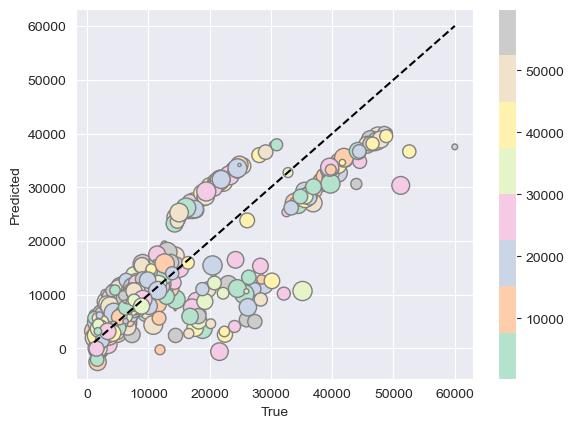

In [107]:
sizes = np.random.randint(200, size=len(Y_pred))
colors = np.random.randint(60000, size=len(Y_pred))
plt.scatter(Y_test, Y_pred, c=colors,cmap='Pastel2', edgecolors='gray' ,s=sizes)
plt.plot([min(Y_test), max(Y_test)] , [min(Y_test), max(Y_test)], 'k--', lw=1.5)
plt.xlabel("True")
plt.ylabel("Predicted")
plt.colorbar()
plt.show()

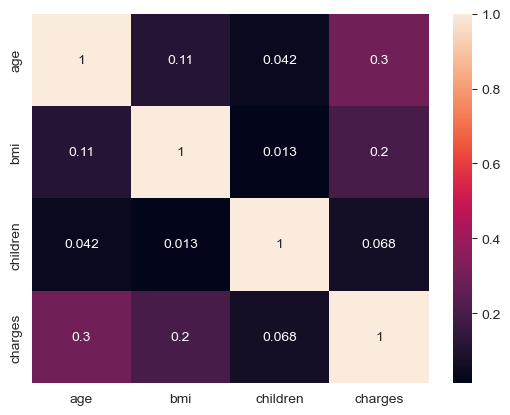

In [118]:
corr_relation = dataset.corr()
sns.heatmap(corr_relation, cmap='rocket', annot=True)
plt.show()